# This example demonstrate how to train region classification (standart image classification model).

Dataset preparation
----------------------------
Get the dataset for training the model from the options dataset
https://nomeroff.net.ua/datasets/autoriaNumberplateOptionsDataset-2021-07-08.zip
In order to convert the dataset to the target, use the script **bin/makeOrientationDataset.js** (before starting, install the nodejs module node-cmd, for example, "npm install node-cmd")

In [1]:
# Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
# os.environ["CUDA_VISIBLE_DEVICES"] = ""  # For CPU inference
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [2]:
import os
import sys
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# Nomeroff-Net path
NOMEROFF_NET_DIR = os.path.abspath('../')
sys.path.append(NOMEROFF_NET_DIR)

In [3]:
# auto download latest dataset
from nomeroff_net.tools import modelhub

# download latest dataset
#info = modelhub.download_dataset_for_model("numberplate_orientation")
#PATH_TO_DATASET = info["dataset_path"]

# or local path dataset
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "../datasets/spatial_transformer_dataset")

In [4]:
PATH_TO_DATASET

'/mnt/store/nomeroff-net/nomeroff-net/../datasets/spatial_transformer_dataset'

In [5]:
DATASET_NAME = "orientations"
VERSION = "2021_07_21_pytorch_lightning"

RESULT_PATH = os.path.join(NOMEROFF_NET_DIR, "./data/models/", 'numberplate_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [6]:
from nomeroff_net import OrientationDetector

# definde your parameters
class CustomOrientationDetector(OrientationDetector):
    def __init__(self):
        OrientationDetector.__init__(self)
        
        # output
        self.orientations = [
            0, 
            90, 
            180, 
            270
        ]
        
        
        self.epochs = 100
        self.batch_size = 64
        
        # count gpu for train
        self.gpus = 1
        
        self.height = 300
        self.width = 300


In [7]:
plt.rcParams["figure.figsize"] = (10, 10)

In [8]:
%matplotlib inline 

Loading dataset...
[INFO] 250031471orig.jpeg 0 [261 695 522 903] (1080, 1440, 3)


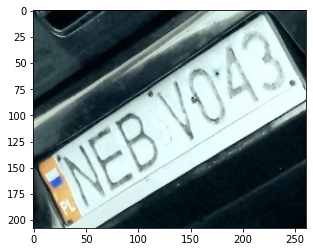

[INFO] 250031471orig.jpeg 90 [ 694  918  902 1179] (1440, 1080, 3)


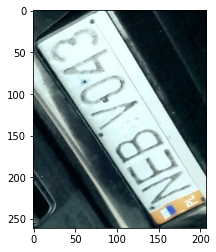

[INFO] 250031471orig.jpeg 180 [ 918  176 1179  385] (1080, 1440, 3)


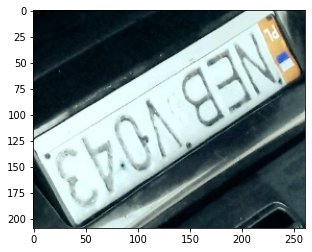

[INFO] 250031471orig.jpeg 270 [176 260 385 522] (1440, 1080, 3)


[INFO] 186485810.jpeg 0 [561 328 625 378] (504, 761, 3)


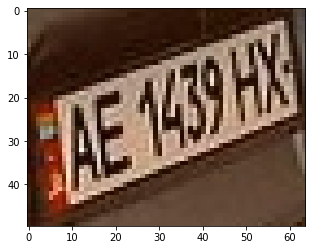

[INFO] 186485810.jpeg 90 [328 135 378 199] (761, 504, 3)


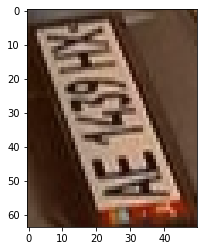

[INFO] 186485810.jpeg 180 [135 126 199 176] (504, 761, 3)


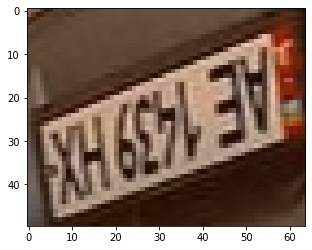

[INFO] 186485810.jpeg 270 [125 561 175 625] (761, 504, 3)


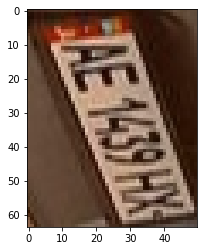

100%|██████████| 376/376 [00:00<00:00, 59319.13it/s]


In [9]:
# initialize region detector.
npOrientationClassificator = CustomOrientationDetector()
npOrientationClassificator.prepare(PATH_TO_DATASET, num_workers=10, verbose=1)

In [10]:
# tune
lr_finder = npOrientationClassificator.tune()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type        | Params
-------------------------------------------
0 | inp_conv   | Conv2d      | 896   
1 | conv1      | Conv2d      | 18.5 K
2 | conv2      | Conv2d      | 73.9 K
3 | conv3      | Conv2d      | 147 K 
4 | pool       | MaxPool2d   | 0     
5 | dropout    | Dropout     | 0     
6 | fc1        | Linear      | 16.8 M
7 | fc2        | Linear      | 131 K 
8 | batch_norm | BatchNorm1d | 1.0 K 
9 | fc3        | Linear      | 1.0 K 
-------------------------------------------
17.2 M    Trainable params
0         Non-trainable params
17.2 M    Total params
68.608    Total estimated model params size (MB)


Restored states from the checkpoint file at /mnt/store/nomeroff-net/nomeroff-net/train/lr_find_temp_model.ckpt
Learning rate set to 0.005754399373371567


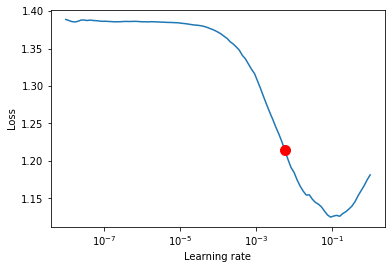

In [11]:
# Results can be found in
lr_finder["lr_find"].results

# Plot with
fig = lr_finder["lr_find"].plot(suggest=True)
fig.show()

In [12]:
# train
model = npOrientationClassificator.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type        | Params
-------------------------------------------
0 | inp_conv   | Conv2d      | 896   
1 | conv1      | Conv2d      | 18.5 K
2 | conv2      | Conv2d      | 73.9 K
3 | conv3      | Conv2d      | 147 K 
4 | pool       | MaxPool2d   | 0     
5 | dropout    | Dropout     | 0     
6 | fc1        | Linear      | 16.8 M
7 | fc2        | Linear      | 131 K 
8 | batch_norm | BatchNorm1d | 1.0 K 
9 | fc3        | Linear      | 1.0 K 
-------------------------------------------
17.2 M    Trainable params
0         Non-trainable params
17.2 M    Total params
68.608    Total estimated model params size (MB)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[INFO] best model path /mnt/store/nomeroff-net/nomeroff-net/data/logs/options/epoch=32-step=15740.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9685173630714417, 'test_loss': 0.7688024640083313}
--------------------------------------------------------------------------------


Loading dataset...
[INFO] 250031471orig.jpeg 0 [261 695 522 903] (1080, 1440, 3)


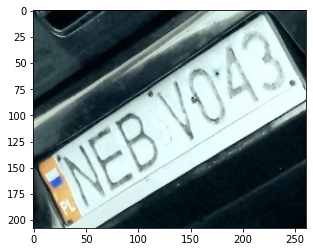

[INFO] 250031471orig.jpeg 90 [ 694  918  902 1179] (1440, 1080, 3)


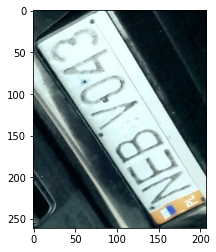

[INFO] 250031471orig.jpeg 180 [ 918  176 1179  385] (1080, 1440, 3)


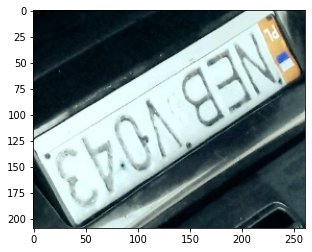

[INFO] 250031471orig.jpeg 270 [176 260 385 522] (1440, 1080, 3)


[INFO] 186485810.jpeg 0 [561 328 625 378] (504, 761, 3)


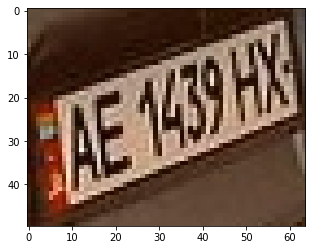

[INFO] 186485810.jpeg 90 [328 135 378 199] (761, 504, 3)


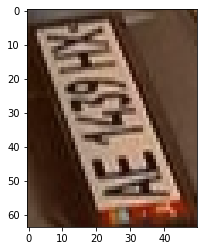

[INFO] 186485810.jpeg 180 [135 126 199 176] (504, 761, 3)


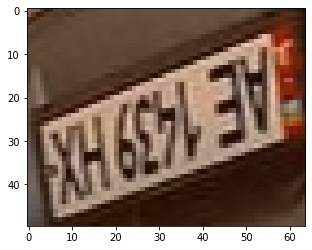

[INFO] 186485810.jpeg 270 [125 561 175 625] (761, 504, 3)


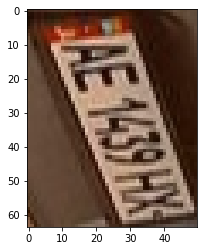


100%|██████████| 7237/7237 [00:00<00:00, 31744.26it/s]

100%|██████████| 376/376 [00:00<00:00, 61409.54it/s]

100%|██████████| 376/376 [00:00<00:00, 61190.33it/s]


In [13]:
npOrientationClassificator.prepare(PATH_TO_DATASET, verbose=1)

In [14]:
npOrientationClassificator.test()

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9685173630714417, 'test_loss': 0.7688024640083313}
--------------------------------------------------------------------------------


[{'test_loss': 0.7688024640083313, 'test_accuracy': 0.9685173630714417}]

In [15]:
npOrientationClassificator.save(RESULT_PATH)

model save to /mnt/store/nomeroff-net/nomeroff-net/./data/models/numberplate_orientations_2021_07_21_pytorch_lightning.ckpt


# Classification Report

In [10]:
npOrientationClassificator.load(RESULT_PATH)

NPOrientationNet(
  (inp_conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=32768, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (batch_norm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=4, bias=True)
)

In [11]:
from nomeroff_net.data_modules.data_loaders import ImgOrientationGenerator
from sklearn.metrics import classification_report
import torch

def orientation_classification_report(npOrientationClassificator, 
                                      path_dir=os.path.join(PATH_TO_DATASET, "val"),
                                      json_path=os.path.join(PATH_TO_DATASET, "val", "via_region_data_orientation.json"),
                                      mode_torch="gpu"):
    imageGenerator = ImgOrientationGenerator(
        json_path,
        path_dir,
        img_w=npOrientationClassificator.width,
        img_h=npOrientationClassificator.height,
        batch_size=npOrientationClassificator.batch_size,
        angles=npOrientationClassificator.orientations)
    
    imageGenerator.build_data()
    gen = imageGenerator.path_generator()
    
    out_idx_all = []
    label_idx_all = []
    for i, (img_paths, inputs, labels) in enumerate(gen, 0):
        labels = torch.from_numpy(labels)
        # get the inputs; data is a list of [inputs, labels]
        inputs = torch.from_numpy(inputs)
        if mode_torch == "gpu":
            inputs = inputs.cuda()
            npOrientationClassificator.model.cuda()
        with torch.no_grad():
            outputs = npOrientationClassificator.model(inputs)
        if mode_torch == "gpu":
            labels = labels.cuda()
        
        out_idx = torch.max(outputs, 1)[1].cpu().numpy()        
        label_idx = torch.max(labels, 1)[1].cpu().numpy()
        
        out_idx_all.extend(out_idx)
        label_idx_all.extend(label_idx)
    #print("out_idx_reg_all", out_idx_reg_all)
    target_names = [str(item) for item in npOrientationClassificator.orientations]
    print("\n\nclass region classification report:")
    print(classification_report(label_idx_all, 
                                out_idx_all, 
                                target_names=target_names))

In [12]:
orientation_classification_report(npOrientationClassificator)

100%|██████████| 376/376 [00:00<00:00, 58517.93it/s]




class region classification report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       400
          90       0.97      0.98      0.97       400
         180       0.98      0.97      0.98       400
         270       0.97      0.98      0.98       400

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600

